<a href="https://colab.research.google.com/github/sakshamkaseraa/ML/blob/main/1093_assn1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler, Binarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split( X, y.values.ravel(), test_size=0.4, random_state=40 )

models = {
    'GaussianNB': (GaussianNB(), X_train, X_test),
    'MultinomialNB': (MultinomialNB(), MinMaxScaler().fit_transform(X_train), MinMaxScaler().fit_transform(X_test)),
    'BernoulliNB': (BernoulliNB(), Binarizer().fit_transform(X_train), Binarizer().fit_transform(X_test))
}

for name, (clf, X_tr, X_te) in models.items():
    clf.fit(X_tr, y_train)
    y_pred = clf.predict(X_te)

    print(f"\n{name}")
    print("Accuracy:       ", round(accuracy_score(y_test, y_pred), 3))
    print("Precision:      ", round(precision_score(y_test, y_pred, average='macro'), 3))
    print("Recall:         ", round(recall_score(y_test, y_pred, average='macro'), 3))
    print("F1 Score:       ", round(f1_score(y_test, y_pred, average='macro'), 3))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



GaussianNB
Accuracy:        0.965
Precision:       0.964
Recall:          0.959
F1 Score:        0.961
Confusion Matrix:
 [[145   3]
 [  5  75]]

MultinomialNB
Accuracy:        0.877
Precision:       0.901
Recall:          0.834
F1 Score:        0.855
Confusion Matrix:
 [[145   3]
 [ 25  55]]

BernoulliNB
Accuracy:        0.649
Precision:       0.325
Recall:          0.5
F1 Score:        0.394
Confusion Matrix:
 [[148   0]
 [ 80   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


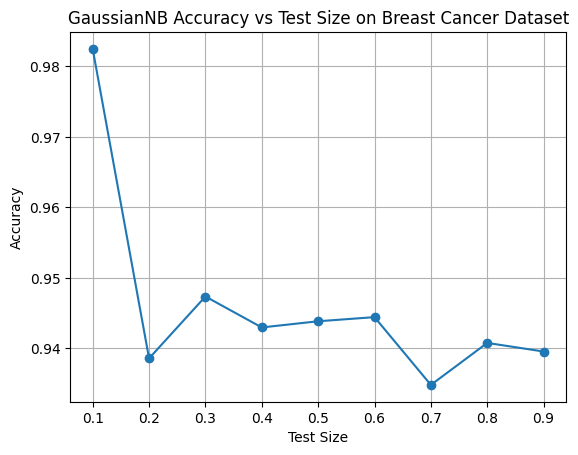

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Define test size splits
test_sizes = [i/10 for i in range(1, 10)]  # from 0.1 to 0.9
accuracies = []

# Evaluate accuracy for each split
for ts in test_sizes:
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=ts, random_state=42, stratify=y)
    clf = GaussianNB().fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    accuracies.append(accuracy_score(y_te, y_pred))

# Plot accuracy vs test size
plt.figure()
plt.plot(test_sizes, accuracies, marker='o')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('GaussianNB Accuracy vs Test Size on Breast Cancer Dataset')
plt.grid(True)
plt.show()



=== Wisconsin Breast Cancer - Decision Tree (GINI) ===
Accuracy: 0.9123
Precision: 0.9019
Recall: 0.9157
F1-score: 0.9075

Classification Report:
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



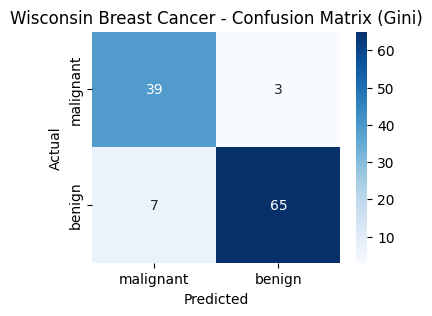

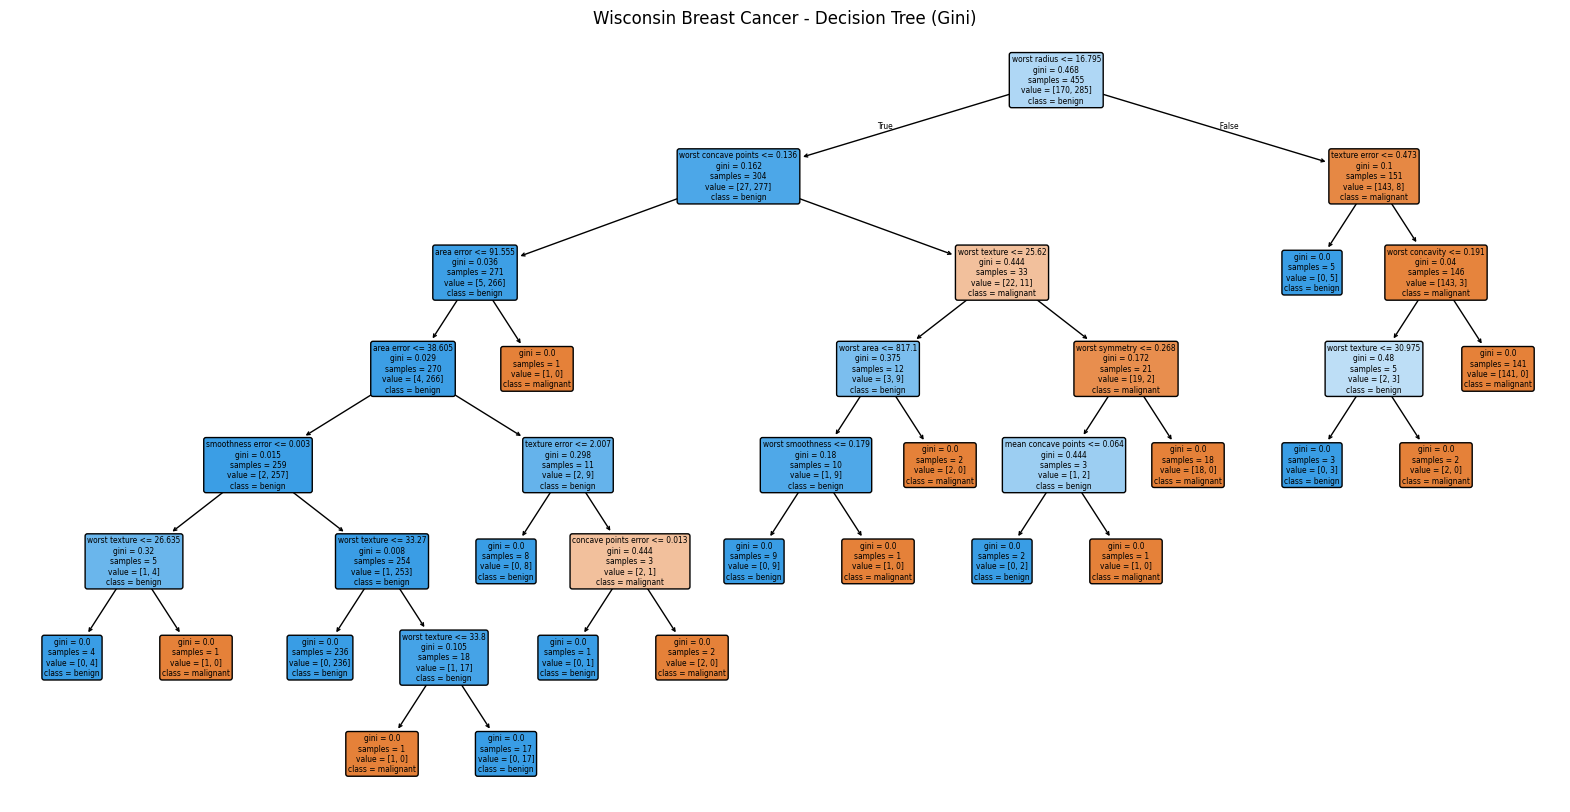


=== Wisconsin Breast Cancer - Decision Tree (ENTROPY) ===
Accuracy: 0.9123
Precision: 0.9015
Recall: 0.9206
F1-score: 0.9082

Classification Report:
              precision    recall  f1-score   support

   malignant       0.83      0.95      0.89        42
      benign       0.97      0.89      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



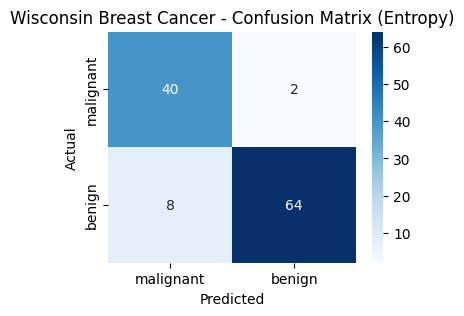

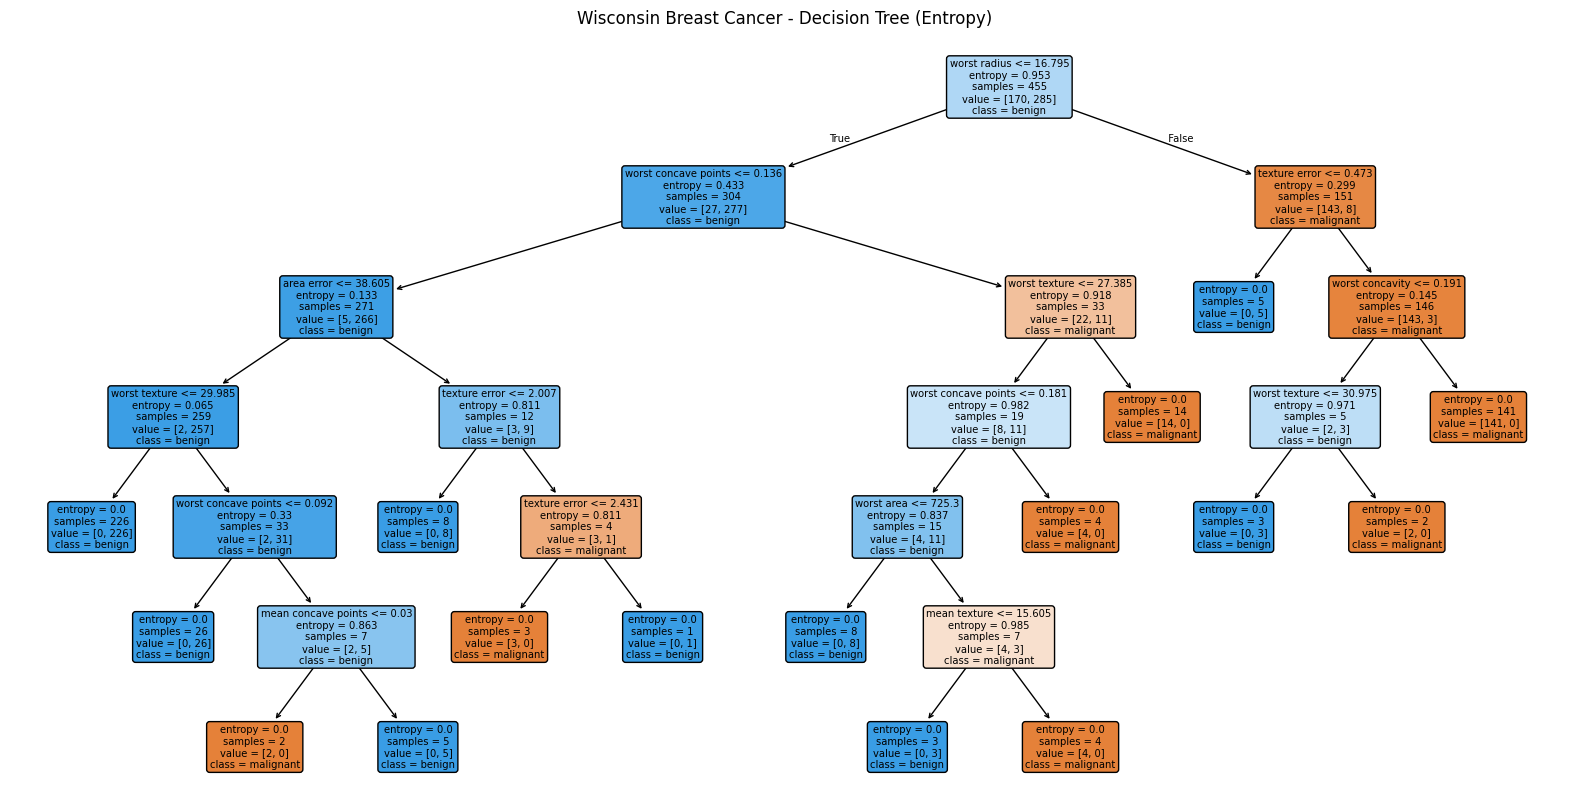

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# ---------- Helper Function ----------
def train_and_evaluate(X, y, feature_names, class_names, dataset_name):
    for criterion in ["gini", "entropy"]:
        print(f"\n=== {dataset_name} - Decision Tree ({criterion.upper()}) ===")

        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

        clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro')
        rec = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        print(f"F1-score: {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=class_names))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"{dataset_name} - Confusion Matrix ({criterion.capitalize()})")
        plt.show()

        # Decision Tree plot
        plt.figure(figsize=(20, 10))
        plot_tree(clf, filled=True, feature_names=feature_names,
                  class_names=class_names, rounded=True)
        plt.title(f"{dataset_name} - Decision Tree ({criterion.capitalize()})")
        plt.savefig(f"{dataset_name}_DecisionTree_{criterion}.png", dpi=300, bbox_inches='tight')
        plt.show()

# ---------- Wisconsin Breast Cancer Dataset ----------
breast = load_breast_cancer()
train_and_evaluate(
    breast.data, breast.target,
    breast.feature_names, breast.target_names,
    dataset_name="Wisconsin Breast Cancer"
)


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        43
           1       0.95      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[39  4]
 [ 0 71]]


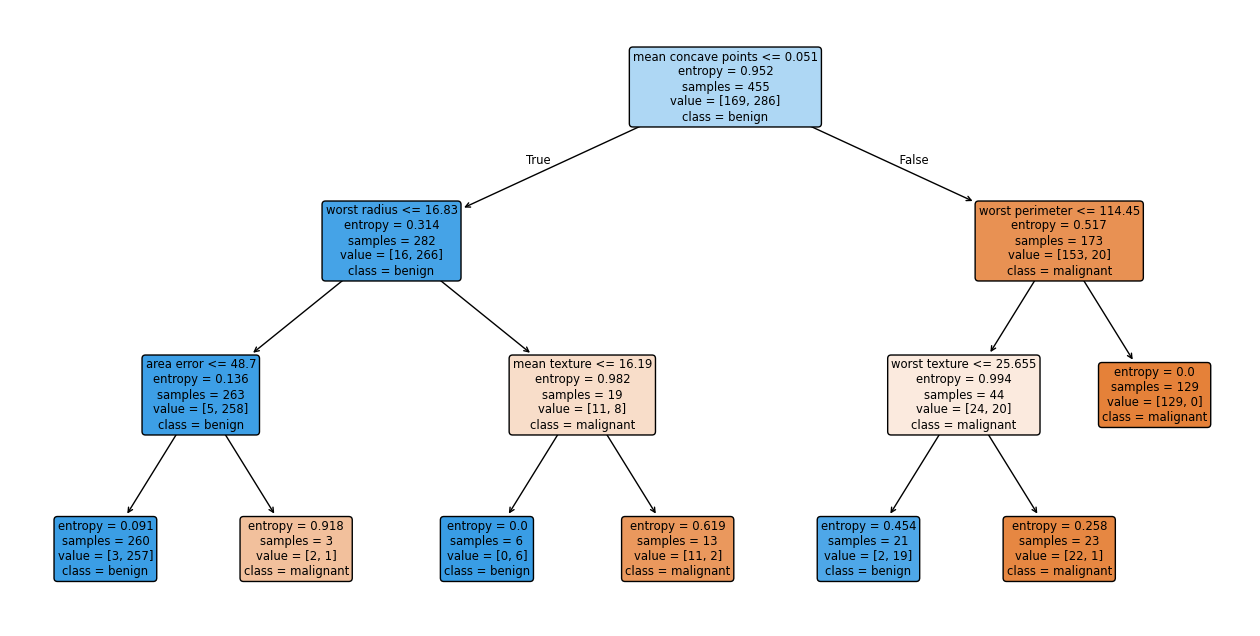

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],          # both criteria
    'max_depth': [None, 3, 5, 7, 10],          # tree depth
    'min_samples_split': [2, 4, 6, 8],         # min samples to split
    'min_samples_leaf': [1, 2, 4]              # min samples in a leaf
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # we optimize for accuracy
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1
)

# Run grid search
grid_search.fit(X_train, y_train)

# Best parameters & model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the decision tree
plt.figure(figsize=(16,8))
plot_tree(best_model, feature_names=data.feature_names, class_names=data.target_names,
          filled=True, rounded=True)
plt.show()
